# Loan Prediction Problem

## Importing Pakages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Import Files

In [ ]:
train=pd.read_csv("train_loan.csv") 
test=pd.read_csv("test_loan.csv")

# making copy of original files
train_original=train.copy() 
test_original=test.copy()

## Understanding Data


In [3]:
# Structure of Train and Test Set
train.columns,test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [4]:
# Dimension of Train and Test Set
train.shape,test.shape

((614, 13), (367, 12))

In [5]:
# Datatypes of each Variables
train.dtypes

# object : Categorical Variables
# int64: Integer Variables
# float64: Decimal Variables

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## Univariate Analysis

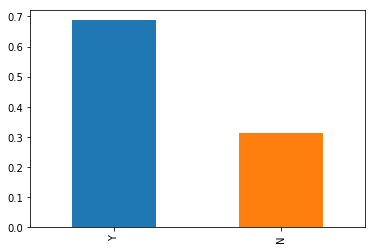

In [6]:
# Analysing target variable
train['Loan_Status'].value_counts(normalize = True).plot.bar()

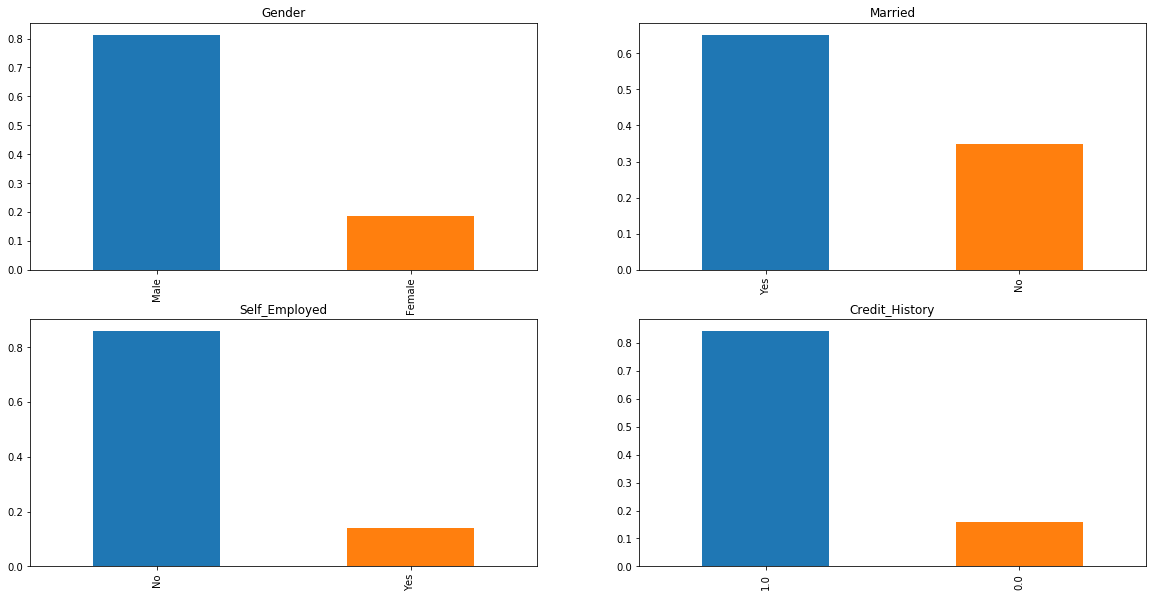

In [7]:
# Independent Variable (Categorical)
#plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223) 
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')


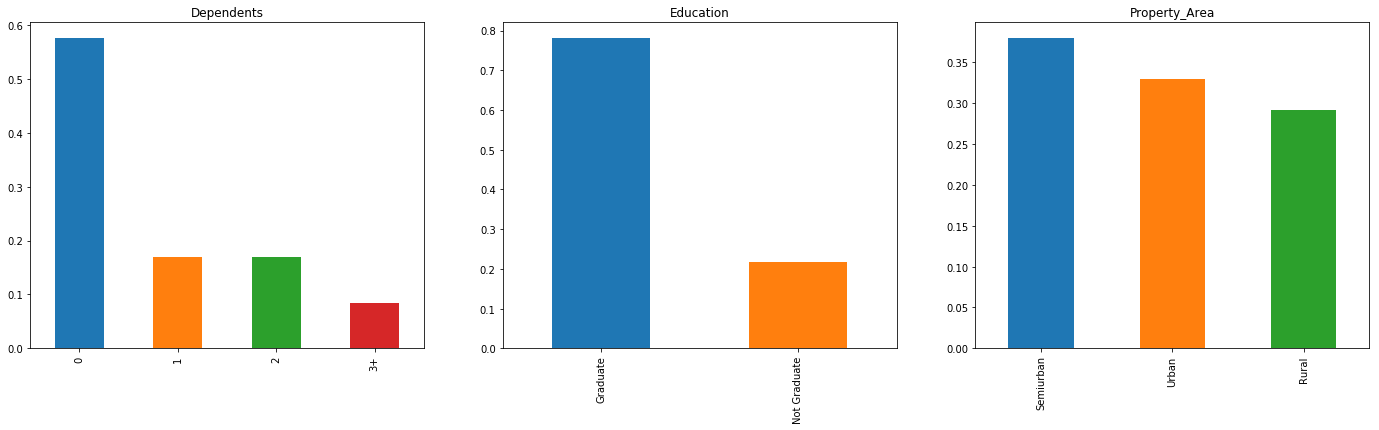

In [8]:
# Independent Variable (Ordinal)

plt.figure(1) 
plt.subplot(131) 
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(132) 
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(133) 
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

In [2]:
# Independent Variable (Numerical)
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122) 
train['ApplicantIncome'].plot.box(style="ticks",figsize=(16,5)) 
plt.show()

NameError: name 'plt' is not defined

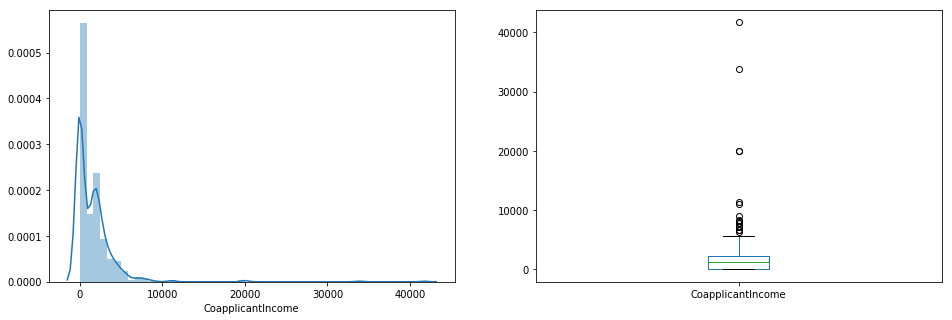

In [10]:
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

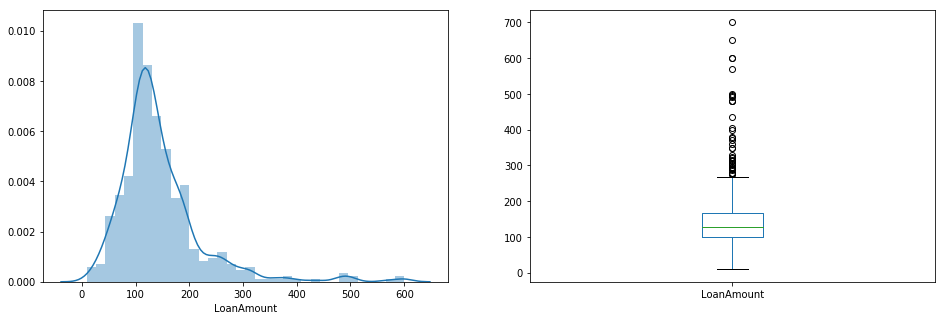

In [11]:
plt.figure(1) 
plt.subplot(121) 
df=train.dropna() 
sns.distplot(df['LoanAmount']); 
plt.subplot(122) 
train['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

## Bivariate Analysis

In [ ]:
# Categorical Independent Variable vs Target Variable
 
Gender=pd.crosstab(train['Gender'],train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Dependents=pd.crosstab(train['Dependents'],train['Loan_Status']) 
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show() 

Education=pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

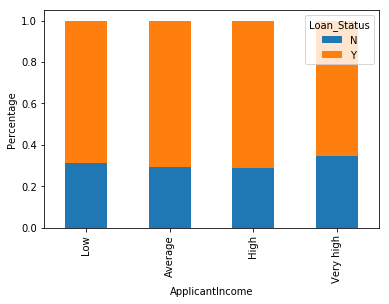

In [12]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
P = plt.ylabel('Percentage')

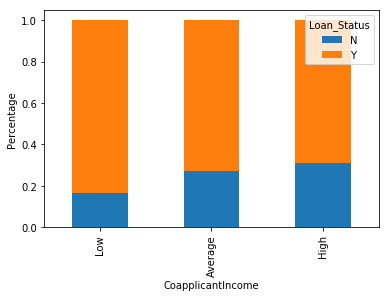

In [14]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome') 
P = plt.ylabel('Percentage')

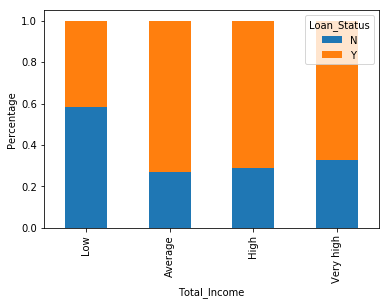

In [16]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

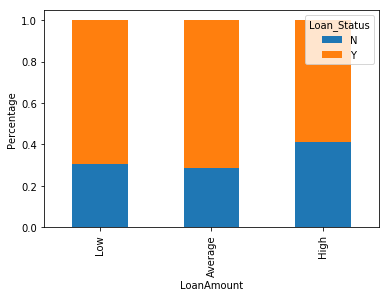

In [18]:
bins=[0,100,200,700] 
group=['Low','Average','High'] 
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [20]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

In [21]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


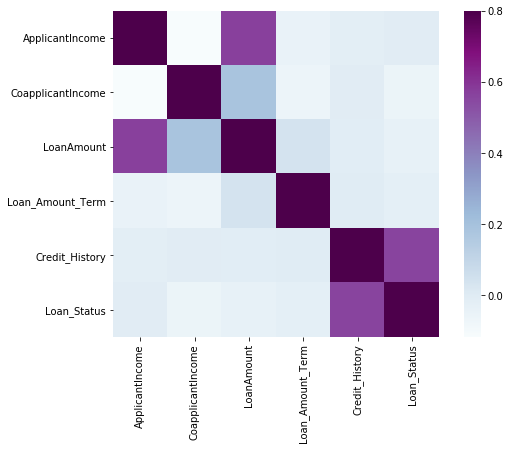

In [22]:
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

## Missing Value Treatement

In [ ]:
train.isnull().sum()

In [23]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
train['Married'].fillna(train['Married'].mode()[0], inplace=True) 
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [24]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [25]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [26]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

## Outlier Treatment

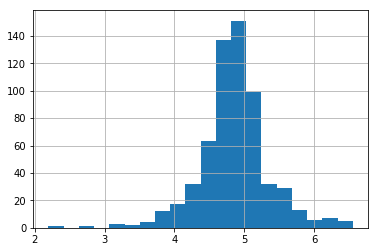

In [28]:
# log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount']) 
train['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

## Model Building

In [29]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [30]:
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

In [31]:
X=pd.get_dummies(X) 
train=pd.get_dummies(train) 
test=pd.get_dummies(test)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,1,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,1,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


## Splitting Dataset

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model = LogisticRegression() 
model.fit(x_train, y_train)

pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)


0.8

In [34]:
pred_test = model.predict(test)

In [41]:
submission=pd.read_csv("Sample_Submission_loan.csv")

submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)


pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index = False)

## Logistic R. using stratified k-folds CV

In [38]:
from sklearn.model_selection import StratifiedKFold

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 

for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = LogisticRegression(random_state=1)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 
    
pred_test = model.predict(test) 
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8278688524590164


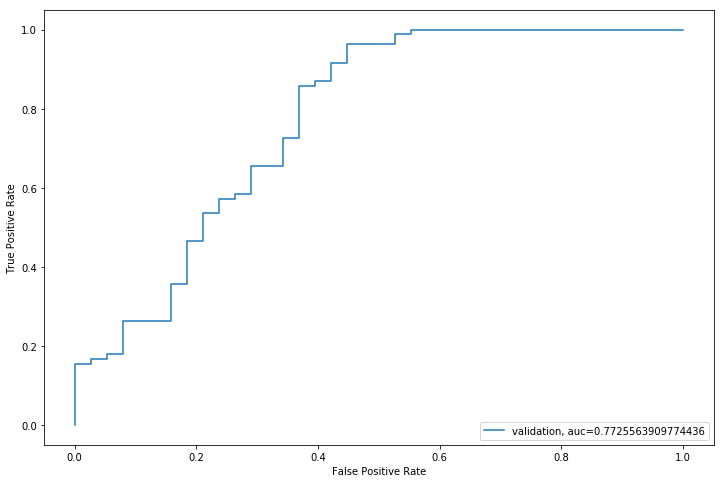

In [40]:
from sklearn import metrics 
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred) 
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.legend(loc=4) 
plt.show()

In [42]:
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
 
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('Logistic_1.csv',index = False)

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y):     
    print('\n{} of kfold {}'.format(i,kf.n_splits))     
    xtr,xvl = X.loc[train_index],X.loc[test_index]     
    ytr,yvl = y[train_index],y[test_index]         
    model = RandomForestClassifier(random_state=1, max_depth=10)     
    model.fit(xtr, ytr)     
    pred_test = model.predict(xvl)     
    score = accuracy_score(yvl,pred_test)     
    print('accuracy_score',score)     
    i+=1 

pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.782258064516129

2 of kfold 5
accuracy_score 0.7661290322580645

3 of kfold 5
accuracy_score 0.7704918032786885

4 of kfold 5
accuracy_score 0.7540983606557377

5 of kfold 5
accuracy_score 0.7950819672131147
